In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk


In [45]:
def time_analysis(data):
    data['date'] = pd.to_datetime(data['date'], errors='coerce')

    # Replace infinity values with NaN 
    data['date'] = data['date'].replace([float("inf"), -float('inf')], np.nan)

    # Forward fill missing dates
    data['date'] = data['date'].ffill()

    # Check for remaining missing values (should ideally be 0)
    print(f"Missing values in 'date' column after forward fill: {data['date'].isnull().sum()}")


    data['date'] = pd.to_datetime(data['date'])
    data['date'] = data['date'].dt.tz_convert('America/New_York')

    data['day_of_week'] = data['date'].dt.day_name()
    articles_by_day = data['day_of_week'].value_counts()
    
    return articles_by_day

In [46]:
def visualize_day_of_week(data):
    data.plot(kind='bar', color='skyblue')
    plt.title('Number of Articles Published by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Articles')
    plt.show()

In [47]:
def eda(data):
    # count headline length
    data['head_line'] = data['headline'].apply(len)
    print(data['head_line'].describe())

    # count publisher frequency
    articles = data['publisher'].value_counts()
    print(articles)


    # analyze publication data to see trends
    articles_by_day = time_analysis(data)
    print(articles_by_day)

    visualize_day_of_week(articles_by_day)
    

    



count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: head_line, dtype: float64
publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64
Missing values in 'date' column after forward fill: 0
day_of_week
Thursday     299995
Wednesday    299321
Tuesday      297182
Friday       244727
Monday       241219
Sunday        14933
Saturday       9951
Name: count, dtype: int64


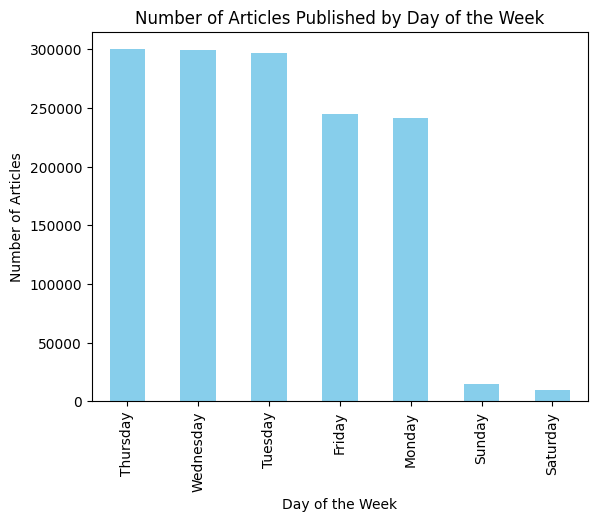

In [48]:
# read data
data = pd.read_csv('../../data/raw_analyst_ratings.csv')

eda(data)